## Loading the Dataset

We start by loading the dataset from the previous week. I'll set the `customerID` as the index column.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../1 - First Week/clean_data.csv', index_col='customerID')
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## Preparing the dataset

In [3]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,tenure,ChargesMonthly,ChargesTotal,Churn_Yes,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,9,65.6,593.30,0,0,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,1
0003-MKNFE,9,59.9,542.40,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
0004-TLHLJ,4,73.9,280.85,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
0011-IGKFF,13,98.0,1237.85,1,1,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
0013-EXCHZ,3,83.9,267.40,1,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


Let's look at features correlation, we don't want our features to have a strong correlation among them.

<AxesSubplot:>

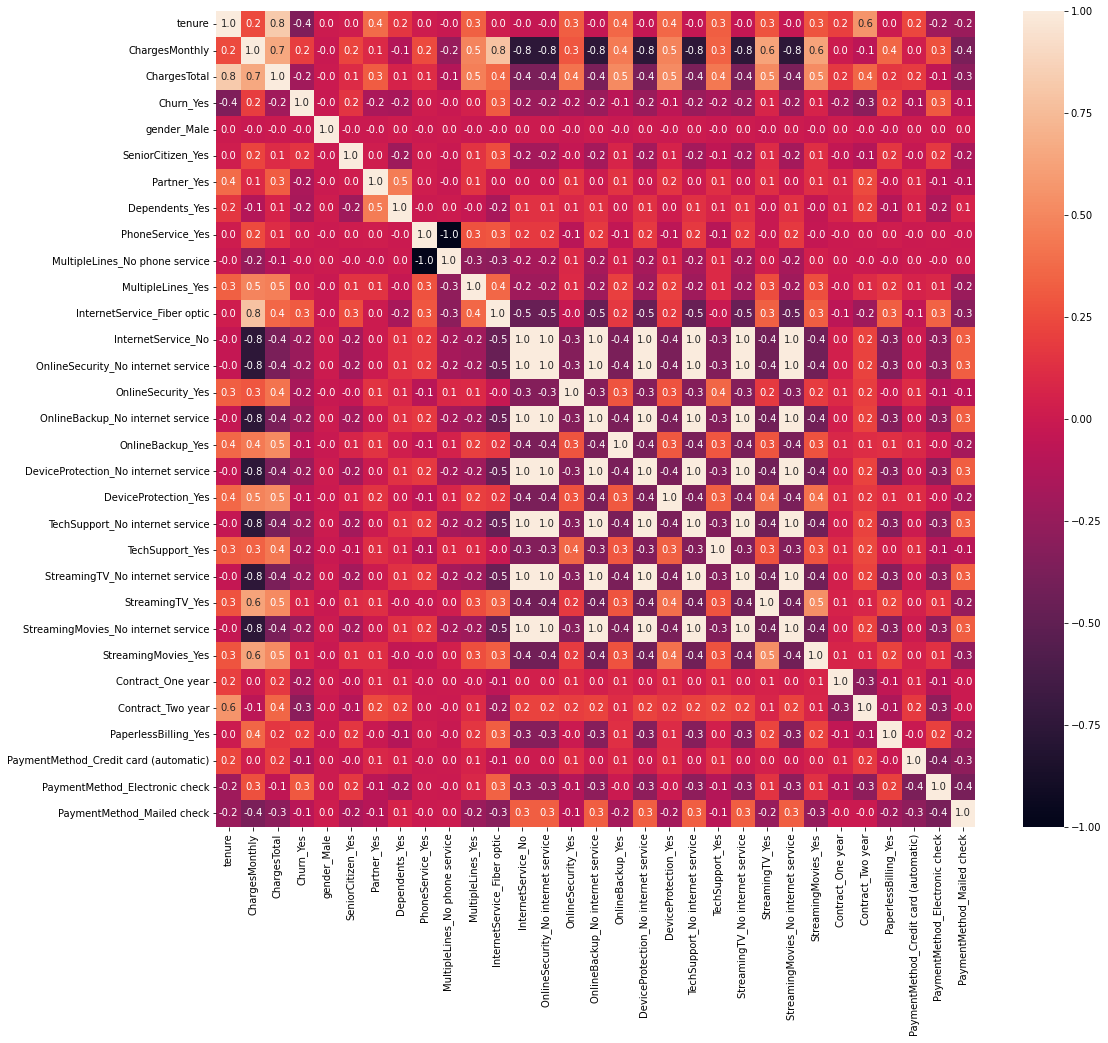

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (17, 15))

sns.heatmap(data.corr(), annot = True, fmt = ".1f")

We can see that the `InternetService_No` feature has a lot of strong correlations with many other  features, this is because these other features depend on the client having internet service. So I'll drop all features that are dependent on this one. The same thing happens with `PhoneService_Yes`.

`tenure` and `ChargesTotal` also have a strong correlation, but I'll try running the models with the two features, as I think they are both important.

I'll plot the heatmap again to make sure I didn't forget anything.

<AxesSubplot:>

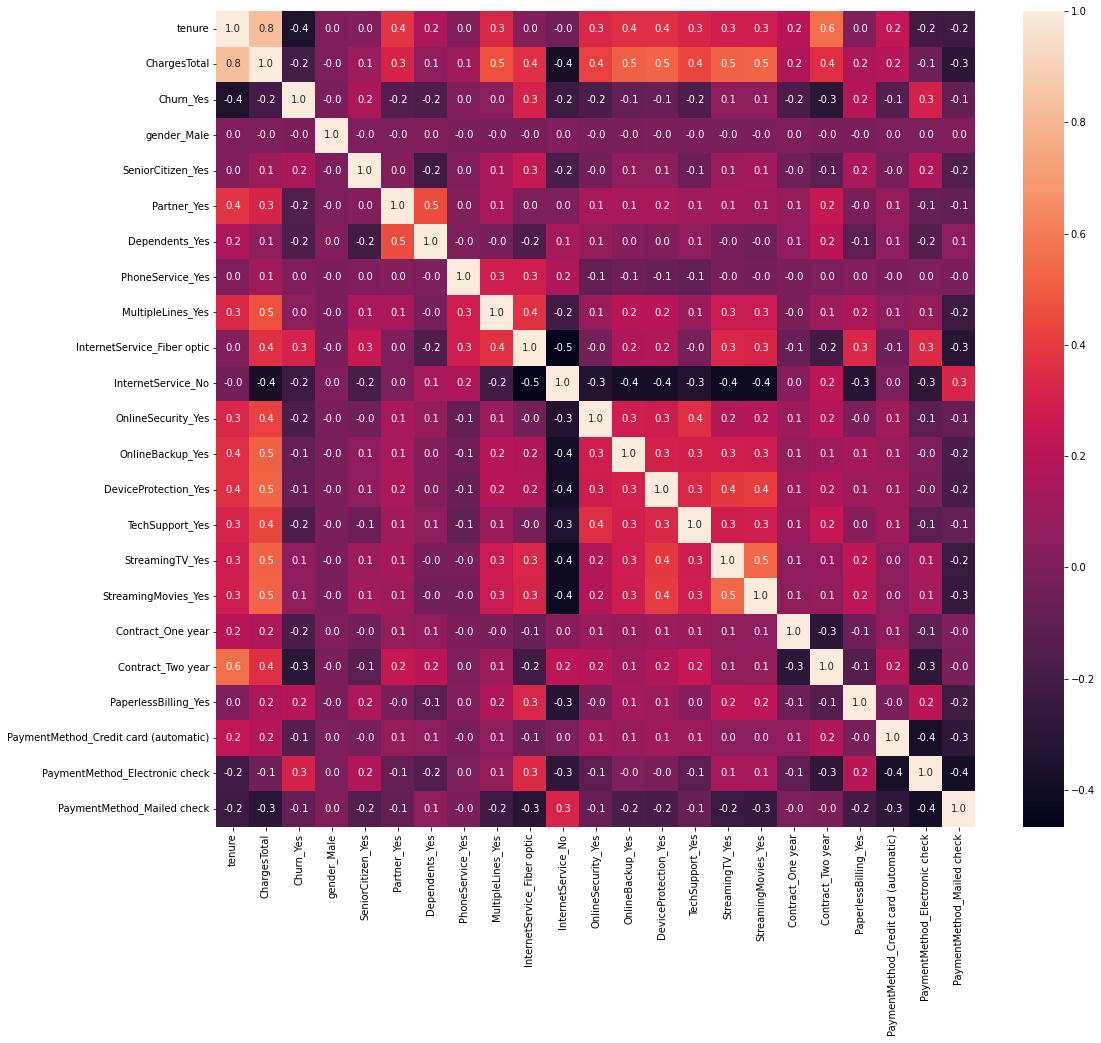

In [5]:
plt.figure(figsize = (17, 15))

data.drop(columns=['ChargesMonthly', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
                    'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service',
                    'StreamingMovies_No internet service', 'MultipleLines_No phone service'], inplace=True)

sns.heatmap(data.corr(), annot = True, fmt = ".1f")

I'll normalize `ChargesTotal` and `tenure`.

In [6]:
import numpy as np

def NormalizeColumn(data, column):
    return (data[column] - np.min(data[column])) / (np.max(data[column]) - np.min(data[column]))

In [7]:
data.ChargesTotal = NormalizeColumn(data, 'ChargesTotal')
data.tenure = NormalizeColumn(data, 'tenure')

data.head()

,tenure,ChargesTotal,Churn_Yes,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0.125000,0.068315,0,0,0,1,1,1,0,0,...,0,1,1,0,1,0,1,0,0,1
0003-MKNFE,0.125000,0.062454,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
0004-TLHLJ,0.055556,0.032338,1,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
0011-IGKFF,0.180556,0.142531,1,1,1,1,0,1,0,1,...,1,0,1,1,0,0,1,0,1,0
0013-EXCHZ,0.041667,0.030789,1,0,1,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,1


## Splitting into test and train data

In [8]:
y = data.Churn_Yes
x = data.drop(columns='Churn_Yes')

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22, stratify=y, shuffle=True)

## Baseline Model

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [11]:
baseline = DummyClassifier(strategy="constant", constant=0)
baseline.fit(x_train, y_train)

y_baseline = baseline.predict(x_test)

baseline_score = accuracy_score(y_test, y_baseline)
print('The Baseline Score is: ', round(baseline_score, 5))

The Baseline Score is:  0.73456


## Model 1

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [59]:
model1_s = RandomForestClassifier()
parameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'max_leaf_nodes': list(range(70,100))
}]

clf = GridSearchCV(model1_s, param_grid=parameters, cv=5)
clf.fit(x_train, y_train)

clf.best_estimator_

RandomForestClassifier(max_depth=10, max_leaf_nodes=77)

In [60]:
model1 = RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=70, random_state=22)
model1.fit(x_train, y_train)

y_model1 = model1.predict(x_test)

model1_score = accuracy_score(y_test, y_model1)
print('The Model 1 Score is: ', round(model1_score, 5))

The Model 1 Score is:  0.78637


## Model 2

In [50]:
from sklearn.svm import LinearSVC

In [ ]:
parameters = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'max_leaf_nodes': list(range(70,100))
}]

clf = GridSearchCV(model1_s, param_grid=parameters, cv=5)
clf.fit(x_train, y_train)

clf.best_estimator_

In [59]:
model2 = LinearSVC(random_state=22)
model2.fit(x_train, y_train)

y_model2 = model2.predict(x_test)

model2_score = accuracy_score(y_test, y_model2)
print('The Model 2 Score is: ', round(model2_score, 5))

The Model 2 Score is:  0.78992


## Conclusion